## Industrial Machine Fault Detection using Deep Learning
### Machines: Pumps, motors, valves etc. 

### Training a MLP on MFCC features generated from equipment sound files

- Rajesh Siraskar | 22-May-2021
----
- V.2.0: Add predict
- V.2.1: Add seaborn plots with error bands
- V.2.2: Compact version. Move utilities to utilities.py 
----
- Load data
- Split into train/test
- Build MLP network architecture
- Compile network
- Train network

In [16]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Custom utilities
from utilities import *

%matplotlib inline

warnings.filterwarnings("ignore")

In [9]:
JSON_FILE = "audio_files/machine_features.json"
NUMBER_OF_CLASSES = 6 # Machine normal/abnormal
TRAIN_EPOCHS = 200

### Main function
- Network: 
    - 1 input  = Flatten 3-D numpy array and use only 2-Ds (mfcc and hop-length)
    - 3 hidden = 512 x 256 x 64. Activation = ReLU
    - 1 output = Number of classes (genres). 4 genres. Activation = softmax  
- Mini-batch
- Adam optimization
- Learning-rate=0.0001

In [10]:
### 1. Load data
X, y = load_data (json_file = JSON_FILE)


### 2. Split into train/test
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3)

### 3. Build MLP network architecture
#     i/p, 3 hidden, o/p and all fully-connected (i.e. dense)
model = keras.Sequential([
    # Input layer: 
    #   input json is a 3D file: We ignore 1st dim and consider only 2nd and 3rd dims
    #   MFCC for each segment, and each mfcc is a vector over an interval = hop-length
    #   - dimension 1: num_segments x n_classes x .wav-files-per-class 
    #   - dimension 2: num_mfcc_vectors_per_segment = math.ceil(samples_per_segment/hop_length)
    #   - dimension 3: num_mfcc
    #   X.shape[1] = dim-2 and X.shape[2]=dim-2
    #   first-dim: interval = inputs.shape[1]
    #   second-dim: mfcc = inputs.shape[2]
    #   NOTE: inputs.shape[0] is the segment number and we are not passing that
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),
    
    # 1st hidden-layer:
    #   Use ReLU instead of sigmoid. Much faster.
    #   ReLU better convergence. Reduce likelihood of vanishing gradients
    #   Vanishing gradients: Multiply error by derivative of activation fn.
    #   Sigmoid fn. derivative = 0.25. Keep multiplying by 0.25, gradient becomes smaller and smaller
    #   and *vanishes*
    keras.layers.Dense(512, activation="relu"),
    
    # 2nd hidden-layer:
    keras.layers.Dense(256, activation="relu"),
    
    # 3rd hidden-layer:
    keras.layers.Dense(64, activation="relu"),
    
    # Output layer: NUMBER_OF_CLASSES = number of genres = 4
    #   activation fn. = softmax for normalizing prob. sum to 1.0 and enables us to pick max. prob.
    keras.layers.Dense(NUMBER_OF_CLASSES,  activation="softmax")
])


### 4. Compile network
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, 
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

model.summary()

## 5. Train network. 
#     Use min-batch. Other techniques
#     (1) Stochastic = Gradient on one sample, fast, inaccurate. 
#     (2) Full training set: Very accurate 
#     (3) Mini-batch: in-between

history = model.fit(X_train, y_train,                 # Training data
                    validation_data=(X_test, y_test), # Test data
                    epochs=TRAIN_EPOCHS,
                    batch_size=32) 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 1080)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               553472    
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_10 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 390       
Total params: 701,638
Trainable params: 701,638
Non-trainable params: 0
_________________________________________________________________
Train on 201 samples, validate on 87 samples
Epoch 1/200
201/201 [==============================] - 0s 934us/sampl

201/201 [==============================] - 0s 198us/sample - loss: 2.7205 - acc: 0.3632 - val_loss: 10.3888 - val_acc: 0.1264
Epoch 53/200
201/201 [==============================] - 0s 222us/sample - loss: 4.2141 - acc: 0.3930 - val_loss: 10.0580 - val_acc: 0.0575
Epoch 54/200
201/201 [==============================] - 0s 176us/sample - loss: 5.0124 - acc: 0.3433 - val_loss: 11.0746 - val_acc: 0.1149
Epoch 55/200
201/201 [==============================] - 0s 198us/sample - loss: 5.2316 - acc: 0.3433 - val_loss: 13.4975 - val_acc: 0.0805
Epoch 56/200
201/201 [==============================] - 0s 198us/sample - loss: 6.4896 - acc: 0.3234 - val_loss: 9.6443 - val_acc: 0.0920
Epoch 57/200
201/201 [==============================] - 0s 200us/sample - loss: 5.2267 - acc: 0.3731 - val_loss: 7.1925 - val_acc: 0.1379
Epoch 58/200
201/201 [==============================] - 0s 148us/sample - loss: 3.6978 - acc: 0.3980 - val_loss: 6.5007 - val_acc: 0.0920
Epoch 59/200
201/201 [=====================

201/201 [==============================] - 0s 159us/sample - loss: 3.1544 - acc: 0.3682 - val_loss: 12.1942 - val_acc: 0.1264
Epoch 111/200
201/201 [==============================] - 0s 192us/sample - loss: 5.2995 - acc: 0.4129 - val_loss: 12.8751 - val_acc: 0.0690
Epoch 112/200
201/201 [==============================] - 0s 167us/sample - loss: 4.8328 - acc: 0.3831 - val_loss: 9.8622 - val_acc: 0.0230
Epoch 113/200
201/201 [==============================] - 0s 159us/sample - loss: 4.7012 - acc: 0.3881 - val_loss: 8.3813 - val_acc: 0.2529
Epoch 114/200
201/201 [==============================] - ETA: 0s - loss: 6.1240 - acc: 0.406 - 0s 170us/sample - loss: 6.7665 - acc: 0.3333 - val_loss: 12.0946 - val_acc: 0.1264
Epoch 115/200
201/201 [==============================] - 0s 208us/sample - loss: 6.2423 - acc: 0.3532 - val_loss: 10.1951 - val_acc: 0.1609
Epoch 116/200
201/201 [==============================] - 0s 200us/sample - loss: 5.2493 - acc: 0.3831 - val_loss: 9.6143 - val_acc: 0.1494

201/201 [==============================] - 0s 208us/sample - loss: 4.9877 - acc: 0.4328 - val_loss: 8.4787 - val_acc: 0.1494
Epoch 167/200
201/201 [==============================] - 0s 168us/sample - loss: 4.0575 - acc: 0.3383 - val_loss: 11.2354 - val_acc: 0.1494
Epoch 168/200
201/201 [==============================] - 0s 171us/sample - loss: 5.1381 - acc: 0.3582 - val_loss: 11.1932 - val_acc: 0.1954
Epoch 169/200
201/201 [==============================] - ETA: 0s - loss: 7.4728 - acc: 0.406 - 0s 198us/sample - loss: 4.8241 - acc: 0.3930 - val_loss: 10.4195 - val_acc: 0.0575
Epoch 170/200
201/201 [==============================] - 0s 201us/sample - loss: 2.5877 - acc: 0.4577 - val_loss: 11.7732 - val_acc: 0.0805
Epoch 171/200
201/201 [==============================] - 0s 202us/sample - loss: 5.3961 - acc: 0.3682 - val_loss: 11.6945 - val_acc: 0.2414
Epoch 172/200
201/201 [==============================] - 0s 195us/sample - loss: 7.0269 - acc: 0.3582 - val_loss: 13.6272 - val_acc: 0.06

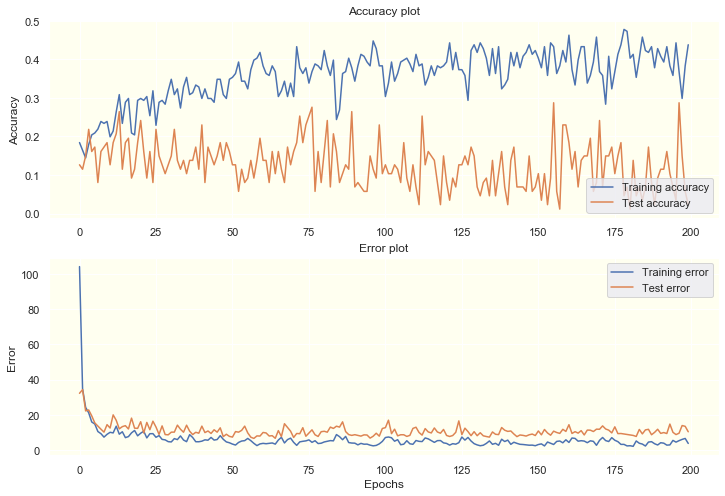

In [11]:
## 6. Plot training curves - NO regularization
plot_history(history, regularization_flag=False)

### Reducing Over-fitting
- 5 techniques
    - Simpler architecture
    - Data-augmentation: Pitch change, Time-stretching, Add noise
    - Early stopping
    - Drop-out
    - Regularization    

- **Drop-out**: NN can't depend on any particular neuron and tries to spread out weights and makes ot robust
- **Regularization**: 
    - Add penalty to error function
    - Punish large weigths
    - L1: Minimize absolute values of weights: $E(p, y) = \frac{1}{2} (p-y)^2 + \lambda \sum |W_i|$
    - L2: Minimize _squared_ values of weights: $E(p, y) = \frac{1}{2} (p-y)^2 + \lambda \sum |W_i|^2$
    - L1: Robust to outliers, simpler model
    - L2: NOT robust to outliers, learns complex patterns

In [12]:
### 1. Load data
X, y = load_data (json_file = JSON_FILE)


### 2. Split into train/test
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.3)

### 3. Build MLP network architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),
    
    # Hidden-layers: With added Dropout amd Regularization with Lambda=0.001
    # 1st hidden-layer:
    keras.layers.Dense(512, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    
    # 2nd hidden-layer:
    keras.layers.Dense(256, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    
    # 3rd hidden-layer:
    keras.layers.Dense(64, activation="relu", kernel_regularizer=keras.regularizers.l2(0.001)),
    keras.layers.Dropout(0.3),
    
    # Output layer: NUMBER_OF_CLASSES = number of genres = 4
    #   activation fn. = softmax for normalizing prob. sum to 1.0 and enables us to pick max. prob.
    keras.layers.Dense(NUMBER_OF_CLASSES,  activation="softmax")
])


### 4. Compile network
optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, 
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

model.summary()

## 5. Train network. 
#     Use min-batch. Other techniques
#     (1) Stochastic = Gradient on one sample, fast, inaccurate. 
#     (2) Full training set: Very accurate 
#     (3) Mini-batch: in-between

history_reg = model.fit(X_train, y_train,                 # Training data
                        validation_data=(X_test, y_test), # Test data
                        epochs=TRAIN_EPOCHS,
                        batch_size=32)  

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 1080)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               553472    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                16448     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)               

201/201 [==============================] - 0s 297us/sample - loss: 6.0018 - acc: 0.1642 - val_loss: 2.6217 - val_acc: 0.2299
Epoch 50/200
201/201 [==============================] - 0s 299us/sample - loss: 6.0890 - acc: 0.1841 - val_loss: 2.6100 - val_acc: 0.2299
Epoch 51/200
201/201 [==============================] - 0s 298us/sample - loss: 5.2811 - acc: 0.2139 - val_loss: 2.6092 - val_acc: 0.2299
Epoch 52/200
201/201 [==============================] - 0s 301us/sample - loss: 5.3095 - acc: 0.1891 - val_loss: 2.6121 - val_acc: 0.2184
Epoch 53/200
201/201 [==============================] - 0s 276us/sample - loss: 5.4389 - acc: 0.1741 - val_loss: 2.6121 - val_acc: 0.2299
Epoch 54/200
201/201 [==============================] - 0s 270us/sample - loss: 5.4108 - acc: 0.1791 - val_loss: 2.6084 - val_acc: 0.2299
Epoch 55/200
201/201 [==============================] - 0s 250us/sample - loss: 5.2878 - acc: 0.1841 - val_loss: 2.6171 - val_acc: 0.2299
Epoch 56/200
201/201 [=========================

201/201 [==============================] - 0s 243us/sample - loss: 2.5646 - acc: 0.2587 - val_loss: 2.6452 - val_acc: 0.1149
Epoch 109/200
201/201 [==============================] - 0s 301us/sample - loss: 2.5820 - acc: 0.2687 - val_loss: 2.6475 - val_acc: 0.1379
Epoch 110/200
201/201 [==============================] - 0s 297us/sample - loss: 2.5809 - acc: 0.2786 - val_loss: 2.6241 - val_acc: 0.1724
Epoch 111/200
201/201 [==============================] - 0s 286us/sample - loss: 2.5904 - acc: 0.2537 - val_loss: 2.6383 - val_acc: 0.2184
Epoch 112/200
201/201 [==============================] - ETA: 0s - loss: 2.4347 - acc: 0.406 - 0s 262us/sample - loss: 2.6496 - acc: 0.2687 - val_loss: 2.6346 - val_acc: 0.1494
Epoch 113/200
201/201 [==============================] - 0s 298us/sample - loss: 2.6243 - acc: 0.2438 - val_loss: 2.6393 - val_acc: 0.1609
Epoch 114/200
201/201 [==============================] - 0s 280us/sample - loss: 2.5298 - acc: 0.2736 - val_loss: 2.6273 - val_acc: 0.1609
Epo

201/201 [==============================] - 0s 250us/sample - loss: 2.4939 - acc: 0.2438 - val_loss: 2.5508 - val_acc: 0.1379
Epoch 167/200
201/201 [==============================] - 0s 296us/sample - loss: 2.5065 - acc: 0.2438 - val_loss: 2.5494 - val_acc: 0.1379
Epoch 168/200
201/201 [==============================] - 0s 248us/sample - loss: 2.4780 - acc: 0.2736 - val_loss: 2.5488 - val_acc: 0.1494
Epoch 169/200
201/201 [==============================] - 0s 277us/sample - loss: 2.5068 - acc: 0.2587 - val_loss: 2.5451 - val_acc: 0.1494
Epoch 170/200
201/201 [==============================] - 0s 228us/sample - loss: 2.5133 - acc: 0.2338 - val_loss: 2.5431 - val_acc: 0.1379
Epoch 171/200
201/201 [==============================] - 0s 210us/sample - loss: 2.5011 - acc: 0.2388 - val_loss: 2.5446 - val_acc: 0.1609
Epoch 172/200
201/201 [==============================] - 0s 250us/sample - loss: 2.5132 - acc: 0.2537 - val_loss: 2.5375 - val_acc: 0.1379
Epoch 173/200
201/201 [==================

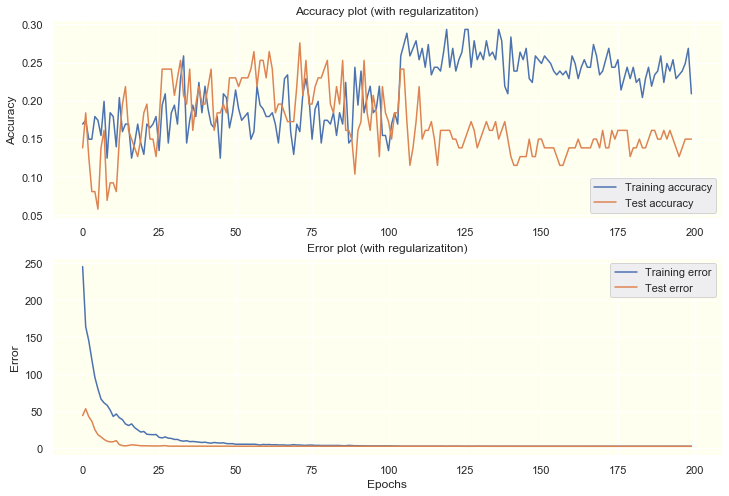

In [13]:
## 6. Plot training curves - With drop-out and L2 regularization
plot_history(history_reg, regularization_flag=True)

In [20]:
import random

# First get the labels from the numerical indices, so that predicted vales are readable
signal_label_mappings = map_signal_labels(JSON_FILE)

## 6. Predict
for n in range(20):
    sample = random.randint(0,19) # Total 20 samples, so select any sample 1-20
    X = X_test[sample] 
    y = y_test[sample]

    predict(model, X, y, signal_label_mappings)

Expected machine signal: 'motor_abnormal'. Predicted machine signal: 'valve_abnormal'
Expected machine signal: 'valve_normal'. Predicted machine signal: 'pump_normal'
Expected machine signal: 'valve_normal'. Predicted machine signal: 'valve_abnormal'
Expected machine signal: 'pump_normal'. Predicted machine signal: 'valve_abnormal'
Expected machine signal: 'motor_abnormal'. Predicted machine signal: 'valve_abnormal'
Expected machine signal: 'valve_normal'. Predicted machine signal: 'pump_normal'
Expected machine signal: 'motor_abnormal'. Predicted machine signal: 'valve_abnormal'
Expected machine signal: 'valve_normal'. Predicted machine signal: 'valve_abnormal'
Expected machine signal: 'pump_normal'. Predicted machine signal: 'valve_abnormal'
Expected machine signal: 'motor_normal'. Predicted machine signal: 'valve_abnormal'
Expected machine signal: 'motor_abnormal'. Predicted machine signal: 'valve_abnormal'
Expected machine signal: 'motor_abnormal'. Predicted machine signal: 'valve_